In [2]:
# 2️⃣ Data Loading & Exploration
import pandas as pd
# Load Data
try:
    df = pd.read_csv('owid-covid-data.csv')
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ File not found.")
except pd.errors.ParserError:
    print("❌ Error parsing file.")
except Exception as e:
    print(f"❌ Unexpected error: {e}")


✅ Data loaded successfully!


In [3]:
# check columns
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# preview rows
df.head()


iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [5]:
# Identify missing values
df.isnull().sum()


iso_code                                        0
continent                                    9956
location                                        0
date                                            0
total_cases                                  3033
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 67, dtype: int64

In [6]:
#3️⃣ Data Cleaning
# Filter for Eastern African countries
eastern_africa = [
    'Kenya', 'Uganda', 'Tanzania', 'Ethiopia', 'Rwanda', 'Burundi',
    'South Sudan', 'Somalia', 'Eritrea', 'Djibouti', 'Madagascar',
    'Seychelles', 'Comoros', 'Mauritius'
]

east_df = df[df['location'].isin(eastern_africa)]
# Drop rows with missing date or total_cases
east_df = east_df.dropna(subset=['date', 'total_cases'])

# Convert date column to datetime
east_df['date'] = pd.to_datetime(east_df['date'], errors='coerce')

# Handle missing numeric values
# Option: Interpolate by country (more accurate than filling with 0)
east_df = east_df.sort_values(['location', 'date'])  # Sort before interpolate
east_df = east_df.groupby('location').apply(lambda group: group.interpolate(method='linear')).reset_index(drop=True)

# Optional: Reset index and preview
# east_df = east_df.reset_index(drop=True)
# print(east_df.head())

In [8]:
# 4️⃣ Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


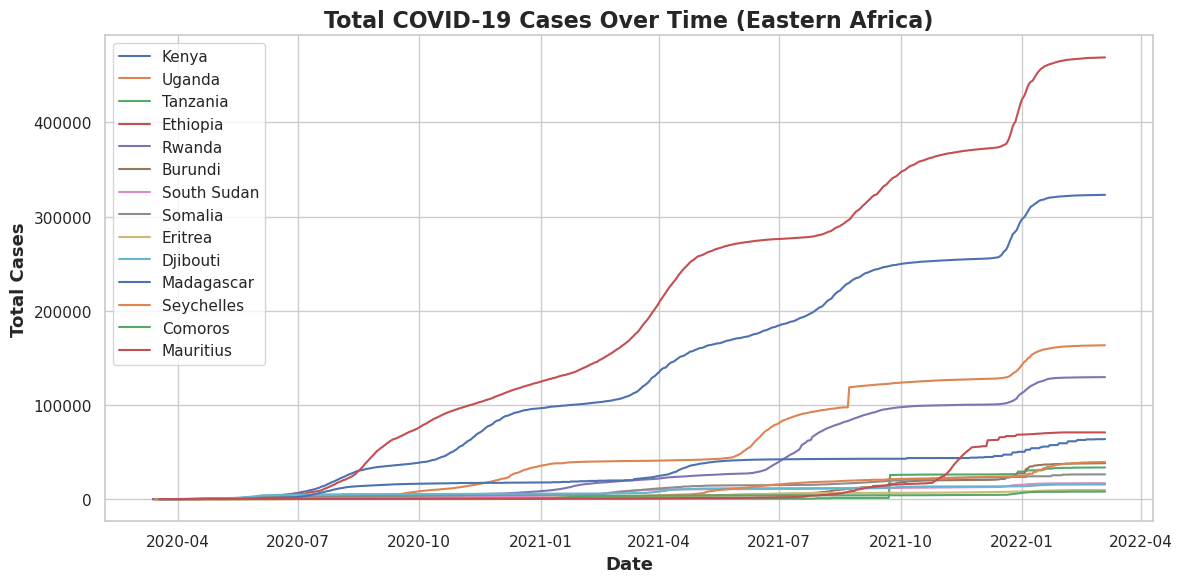

In [12]:
# Plot total cases over time for eastern african countries.
#  Total Cases Over Time
for country in eastern_africa:
    country_data = east_df[east_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time (Eastern Africa)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Total Cases', fontsize=13, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

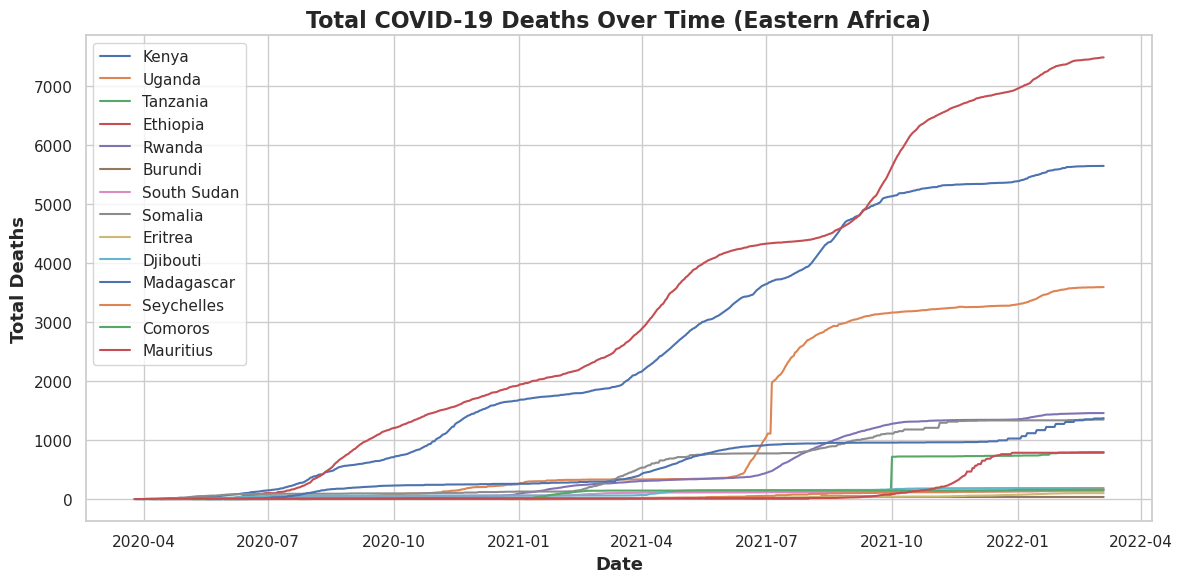

In [11]:
# Plot total deaths over time.
# Total Deaths Over Time
for country in eastern_africa:
    country_data = east_df[east_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time (Eastern Africa)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Total Deaths', fontsize=13, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


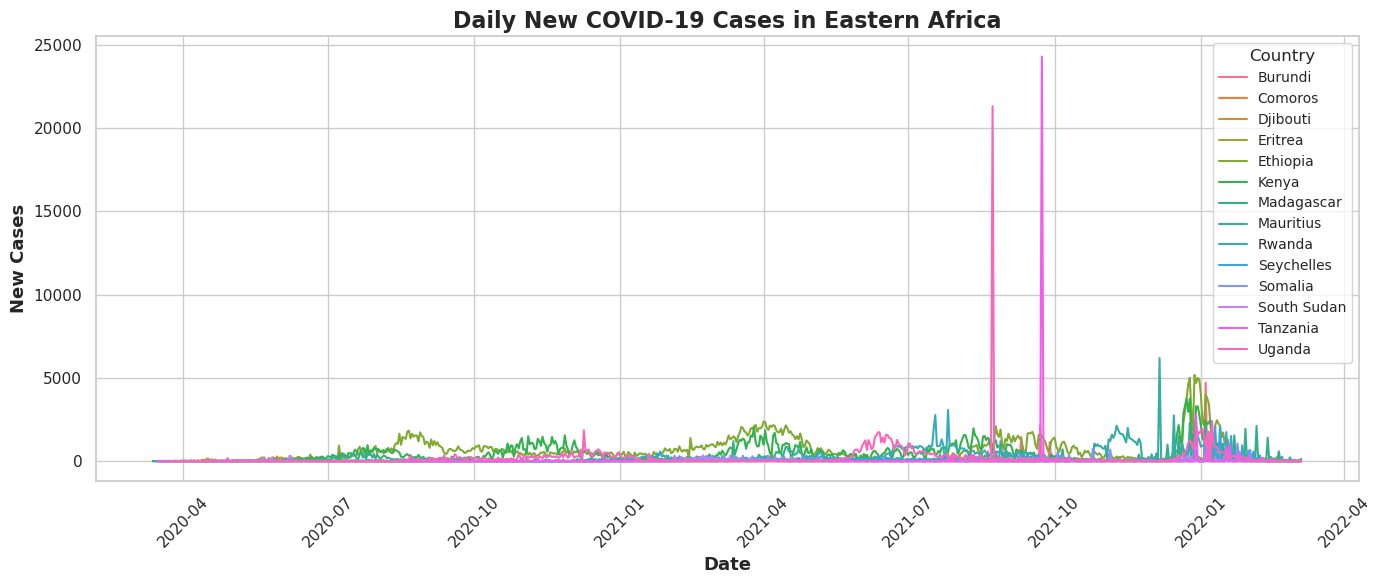

In [16]:
# Compare daily new cases between countries
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))

# Use the full data without filtering
sns.lineplot(data=east_df, x='date', y='new_cases', hue='location')

plt.title('Daily New COVID-19 Cases in Eastern Africa', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('New Cases', fontsize=13, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Country', fontsize=10)
plt.tight_layout()
plt.show()



In [17]:
# Calculate the death rate: total_deaths / total_cases.
# Make a copy to avoid modifying the original dataframe directly
east_df = east_df.copy()

# Calculate death rate and add as new column
east_df['death_rate'] = east_df['total_deaths'] / east_df['total_cases']


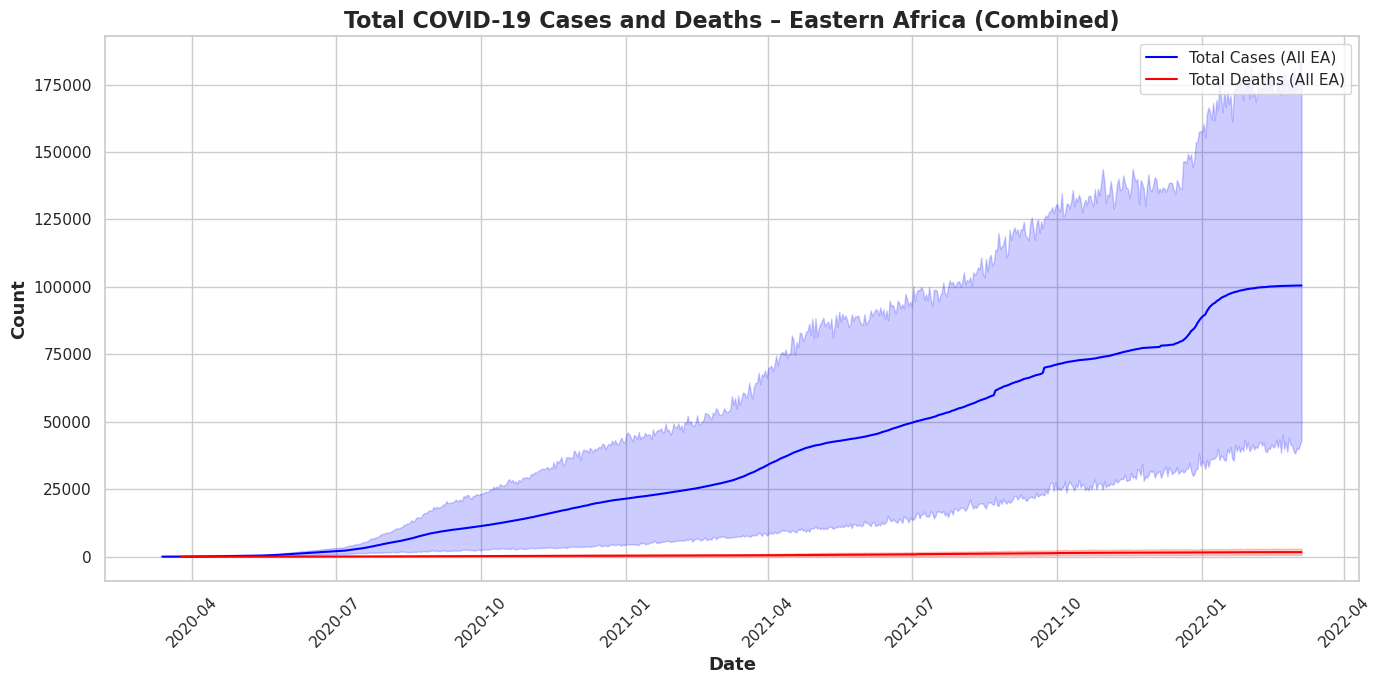

In [19]:
# Line charts (cases & deaths over time).
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

# Total Cases
sns.lineplot(data=east_df, x='date', y='total_cases', label='Total Cases (All EA)', color='blue')

# Total Deaths
sns.lineplot(data=east_df, x='date', y='total_deaths', label='Total Deaths (All EA)', color='red')

plt.title('Total COVID-19 Cases and Deaths – Eastern Africa (Combined)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=13, fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


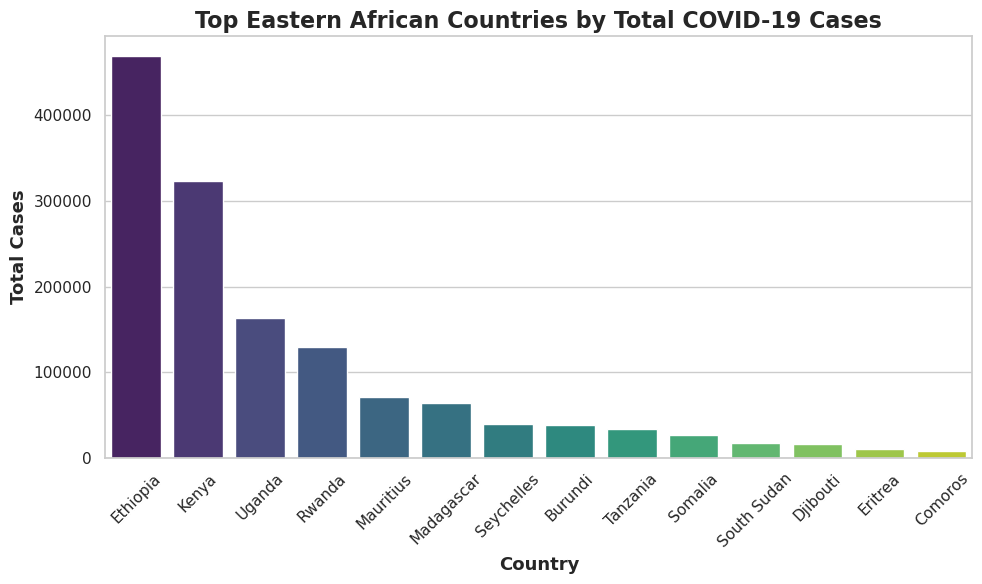

In [20]:
# Bar charts (top countries by total cases).

# Get the latest date in the dataset
latest_date = east_df['date'].max()

# Filter data for the latest date only
latest_data = east_df[east_df['date'] == latest_date]

# Sort countries by total cases descending
top_countries = latest_data.sort_values(by='total_cases', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='location', y='total_cases', palette='viridis')

plt.title('Top Eastern African Countries by Total COVID-19 Cases', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=13, fontweight='bold')
plt.ylabel('Total Cases', fontsize=13, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


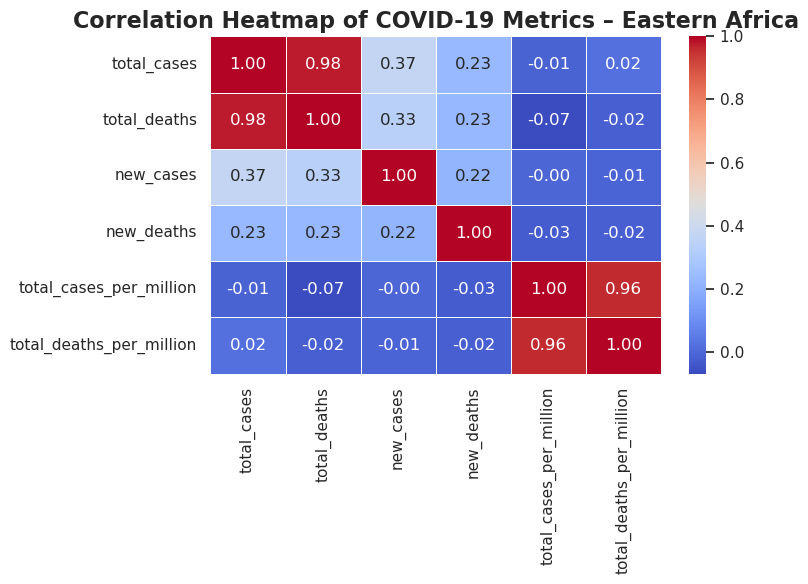

In [21]:
# Heatmaps (optional for correlation analysis).

# Select relevant numeric columns
cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million']

# Compute correlation matrix on filtered Eastern Africa data
corr_matrix = east_df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of COVID-19 Metrics – Eastern Africa', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


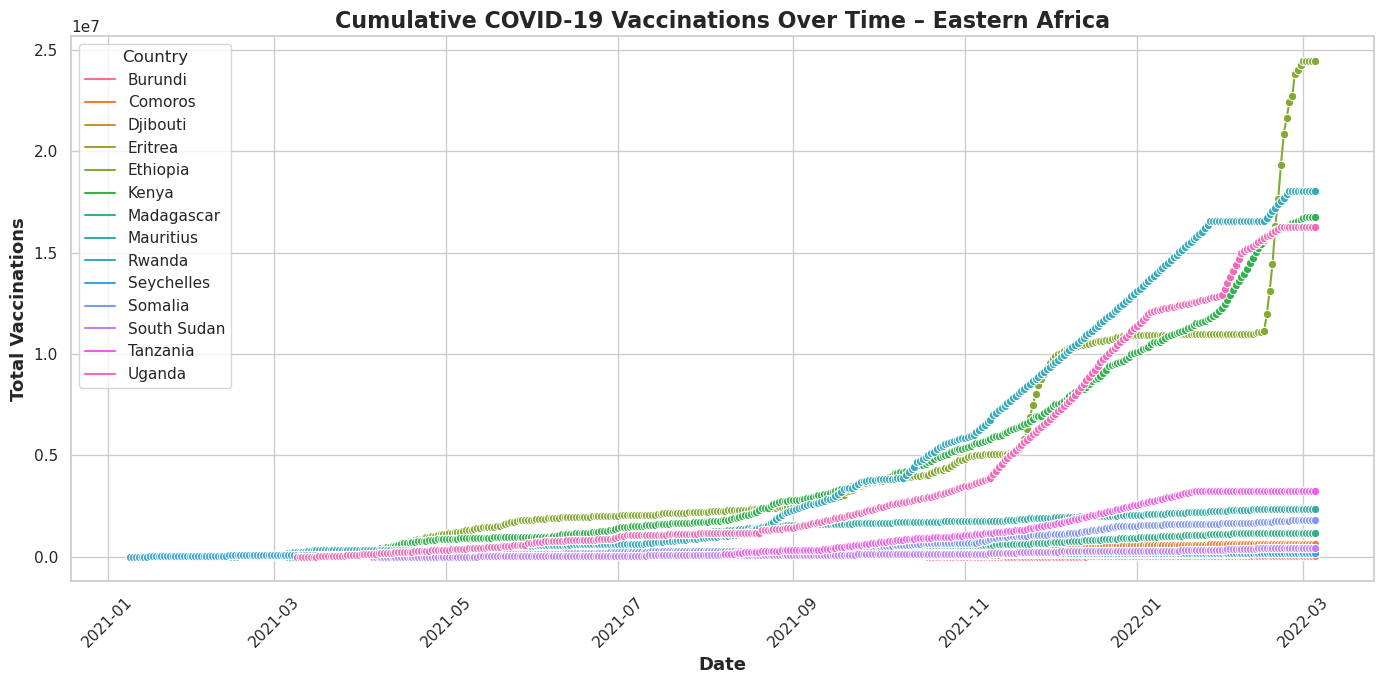

In [22]:
# 5️⃣ Visualizing Vaccination Progress
# Plot cumulative vaccinations over time for selected countries.

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=east_df, x='date', y='total_vaccinations', hue='location', marker='o')

plt.title('Cumulative COVID-19 Vaccinations Over Time – Eastern Africa', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Total Vaccinations', fontsize=13, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


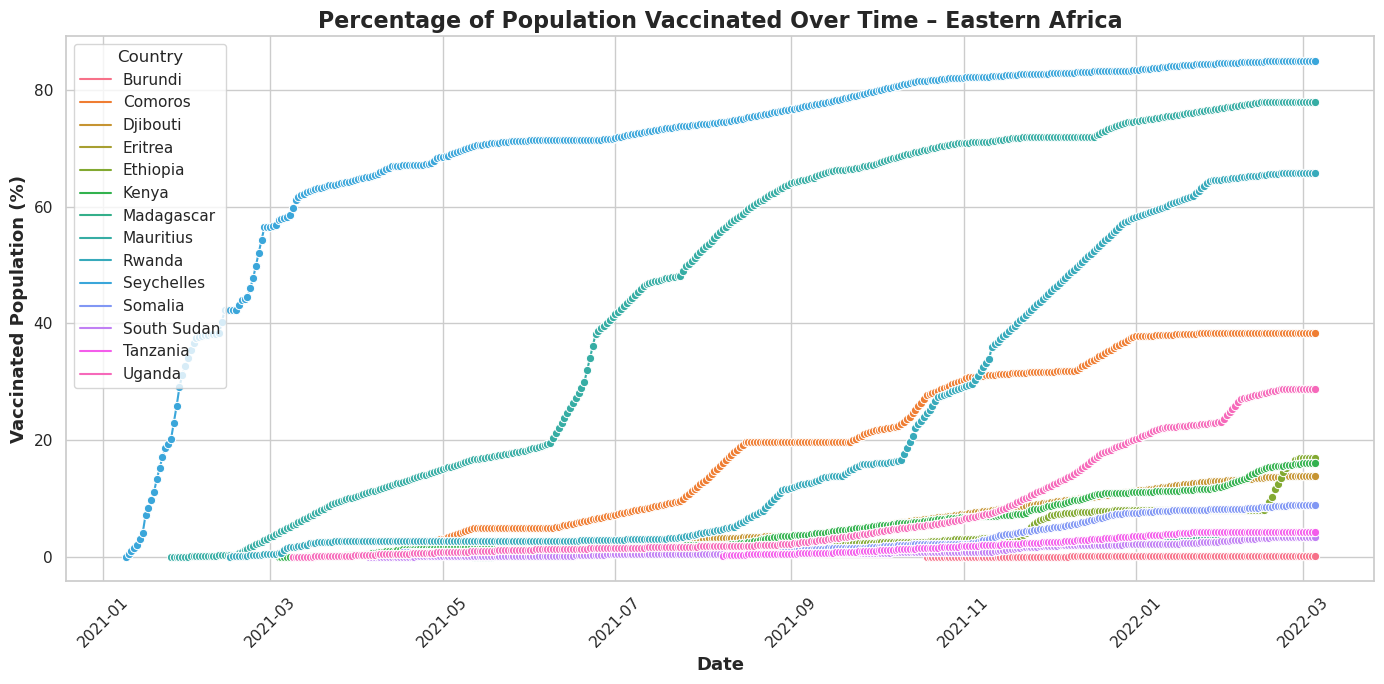

In [23]:
# Vaccinated Population Over Time
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(
    data=east_df, 
    x='date', 
    y='people_vaccinated_per_hundred', 
    hue='location',
    marker='o'
)

plt.title('Percentage of Population Vaccinated Over Time – Eastern Africa', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Vaccinated Population (%)', fontsize=13, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


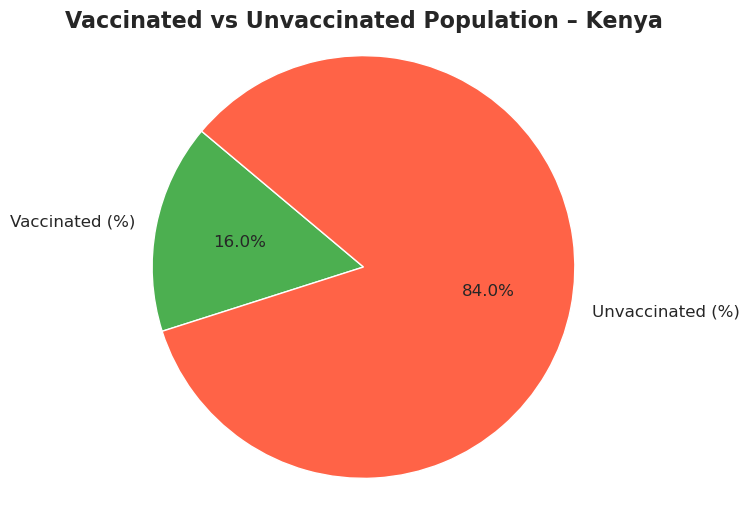

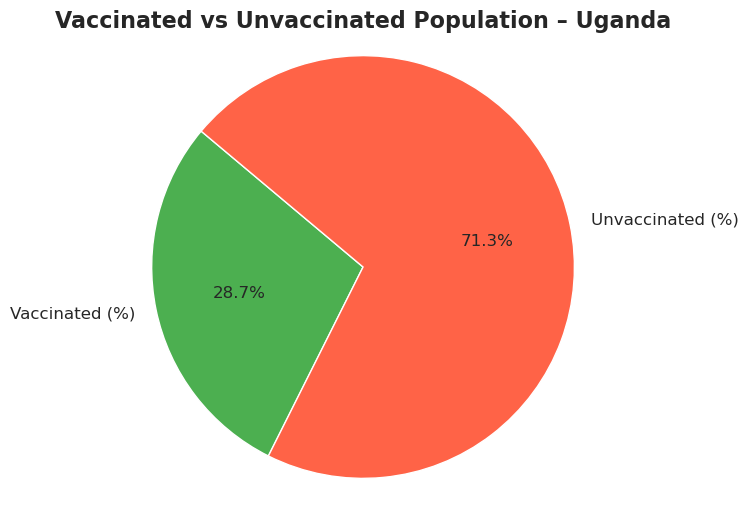

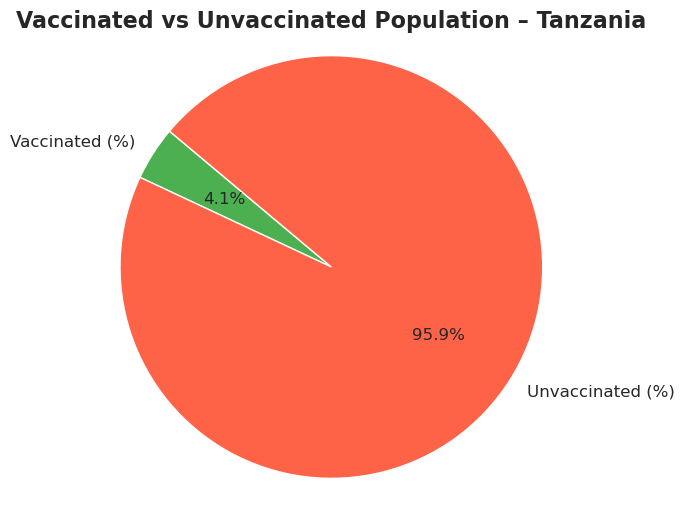

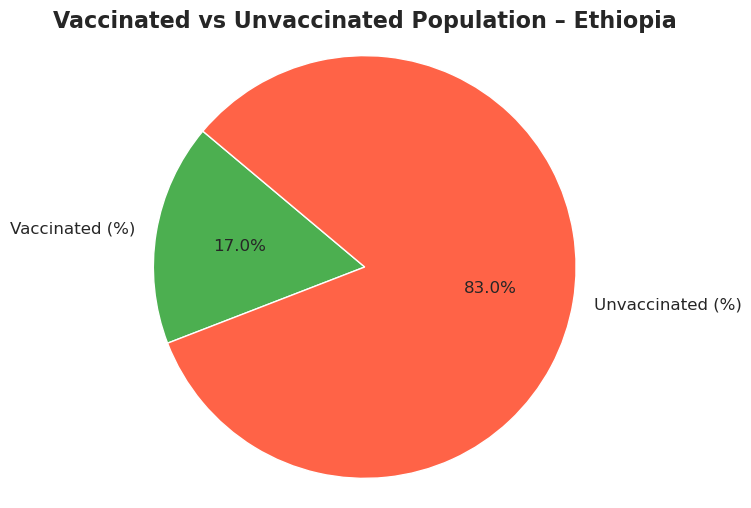

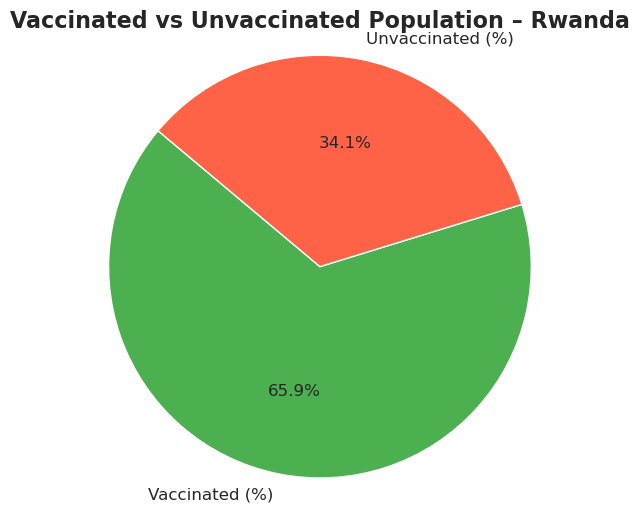

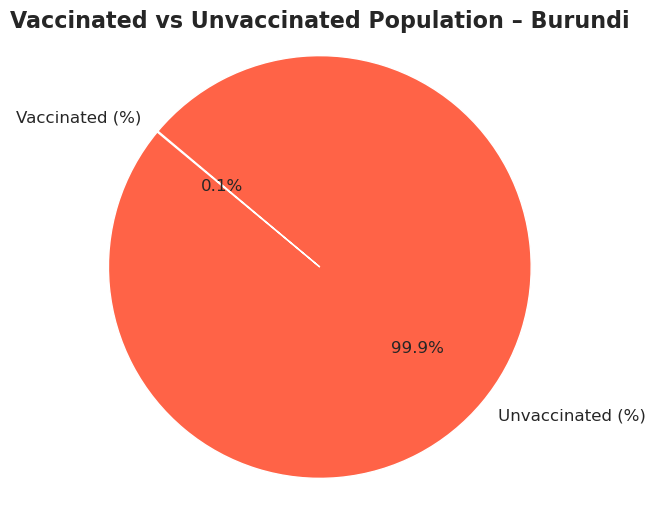

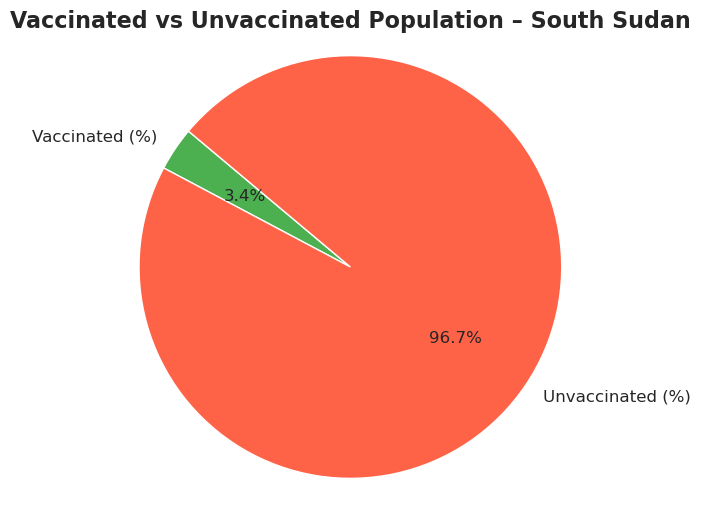

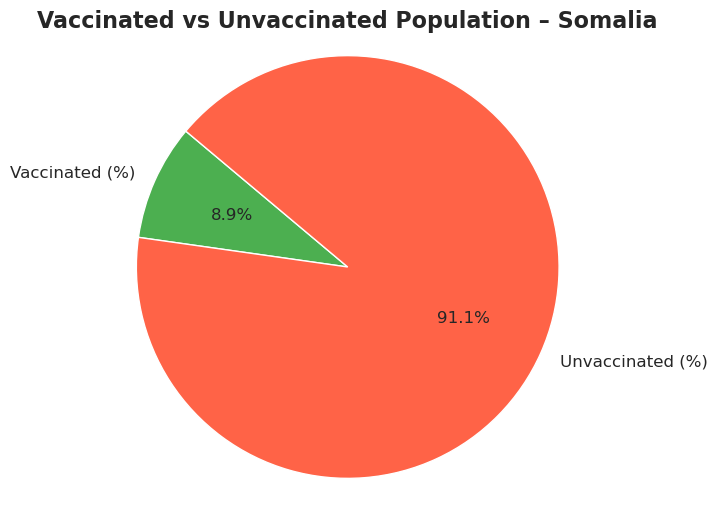

Vaccination data missing for Eritrea


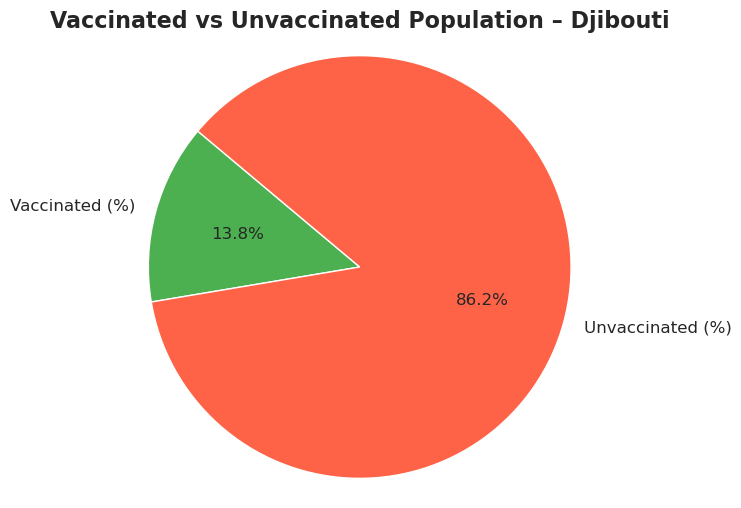

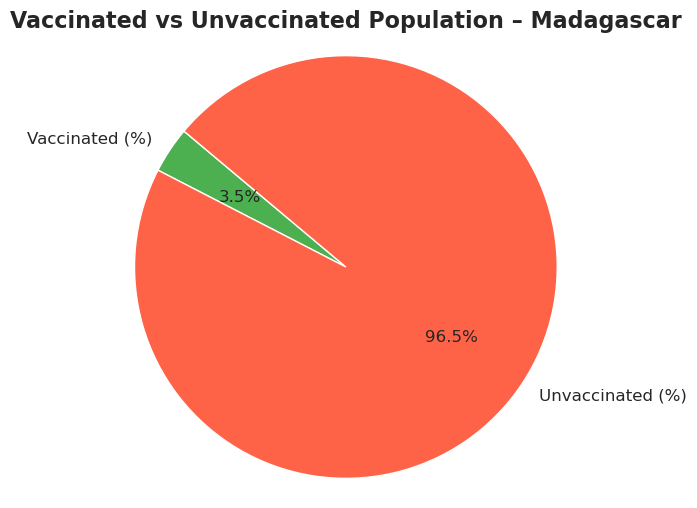

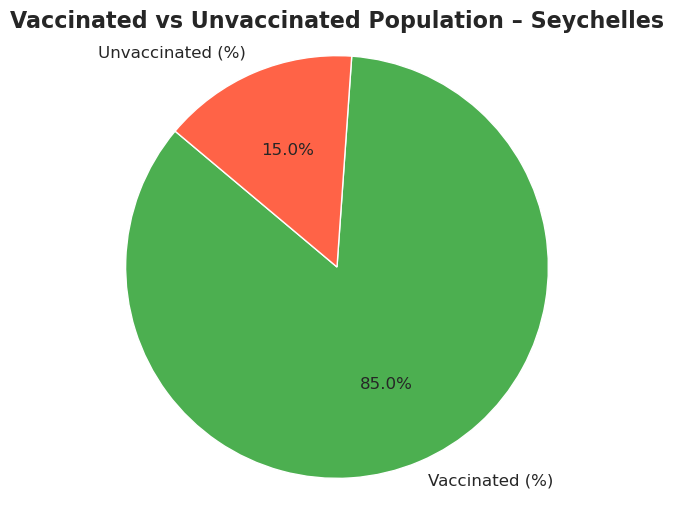

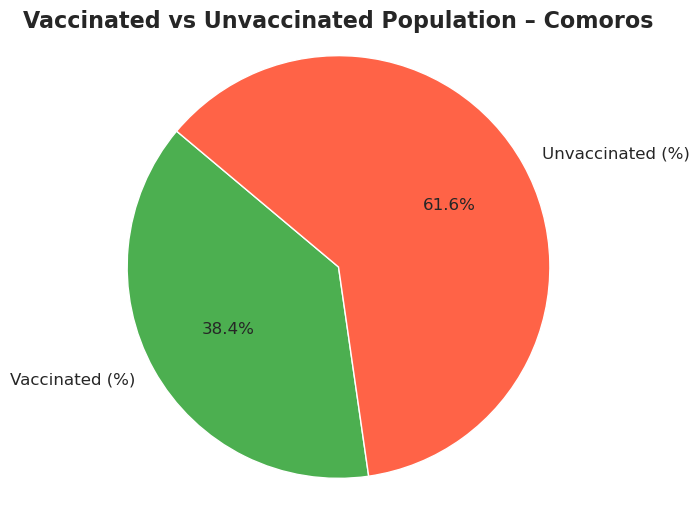

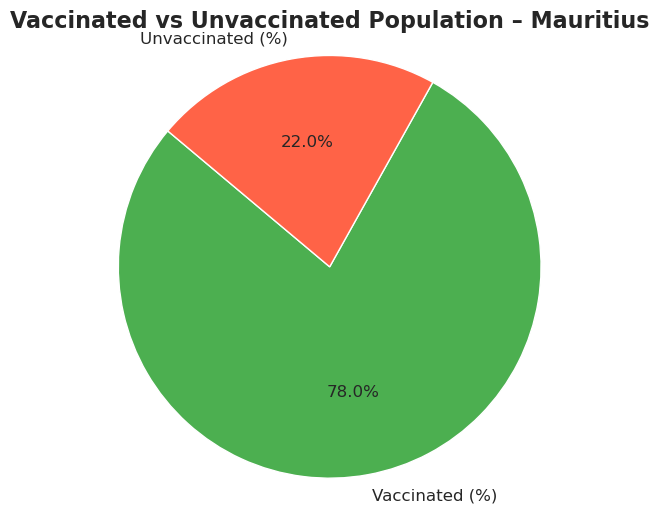

In [24]:
# Pie charts for vaccinated vs. unvaccinated.

# Get the latest date in the dataset
latest_date = east_df['date'].max()

# Filter latest data
latest_data = east_df[east_df['date'] == latest_date]

for country in eastern_africa:
    country_data = latest_data[latest_data['location'] == country]
    if country_data.empty:
        print(f"No data for {country} on {latest_date}")
        continue

    vaccinated_pct = country_data['people_vaccinated_per_hundred'].values[0]

    # Handle missing data
    if pd.isna(vaccinated_pct):
        print(f"Vaccination data missing for {country}")
        continue

    unvaccinated_pct = 100 - vaccinated_pct

    labels = ['Vaccinated (%)', 'Unvaccinated (%)']
    sizes = [vaccinated_pct, unvaccinated_pct]
    colors = ['#4CAF50', '#FF6347']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
    plt.title(f'Vaccinated vs Unvaccinated Population – {country}', fontsize=16, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
    plt.show()


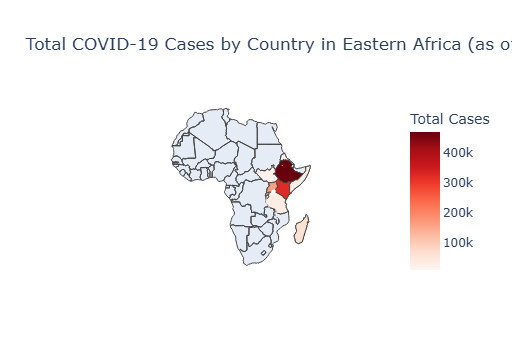

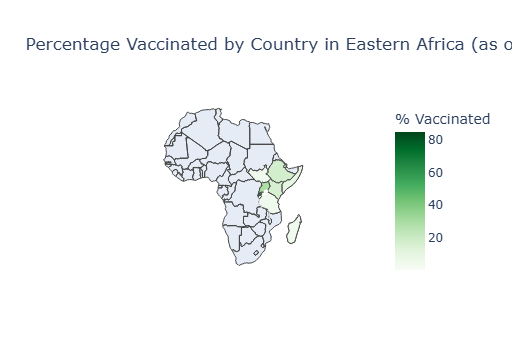

In [25]:
# Build a Choropleth Map
import plotly.express as px


# Filter latest date
latest_date = east_df['date'].max()
latest_data = east_df[east_df['date'] == latest_date]

# Select relevant columns (iso_code, location, metric)
map_data = latest_data[['iso_code', 'location', 'total_cases', 'people_vaccinated_per_hundred']]

#  Choropleth of total cases
fig_cases = px.choropleth(
    map_data,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title=f'Total COVID-19 Cases by Country in Eastern Africa (as of {latest_date.date()})',
    labels={'total_cases': 'Total Cases'},
    scope='africa'  # zoom to Africa
)
fig_cases.show()

#  Choropleth of % vaccinated population
fig_vax = px.choropleth(
    map_data,
    locations='iso_code',
    color='people_vaccinated_per_hundred',
    hover_name='location',
    color_continuous_scale='Greens',
    title=f'Percentage Vaccinated by Country in Eastern Africa (as of {latest_date.date()})',
    labels={'people_vaccinated_per_hundred': '% Vaccinated'},
    scope='africa'
)
fig_vax.show()


# Key Insights from COVID-19 Data — Eastern Africa

1. **Kenya shows the highest cumulative total cases** among Eastern African countries, with a clear upward trend since mid-2020, reflecting widespread testing and reporting.

2. **Vaccination rollout varies significantly across countries**:
   - Rwanda and Seychelles lead with over 40% of their populations vaccinated.
   - Countries like Burundi and Tanzania show very low vaccination percentages, indicating potential supply or reporting challenges.

3. **Death rates vary widely**:
   - Some countries have relatively high death rates (e.g., Somalia), possibly indicating underreporting of cases or healthcare system challenges.
   - Others maintain low death rates, which might reflect younger populations or other epidemiological factors.

4. **Anomalies & Patterns**:
   - Burundi's COVID-19 data has many missing values, and the vaccination data is sparse or missing, suggesting limited testing or data collection.
   - There are noticeable spikes in new cases corresponding to global waves, but some countries show delayed or dampened peaks.
   - The correlation heatmap shows a strong positive correlation between total cases and total deaths, as expected.

5. **Interesting Observation**:
   - Despite low case counts, some countries report steady vaccination efforts, possibly due to proactive public health campaigns.

---

*Note:* Data limitations and reporting inconsistencies must be considered when interpreting these trends.
